In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data=pd.read_csv("../Datos/koi_metadata.csv")
data.fillna(data.median(), inplace=True)
data.head()


,KOI Name,NExScI Disposition,Kepler Name,Period,Time of Transit Epoch,First Transit Time (BJD),Impact Parameter,Duration,Transit Depth,r/R,...,log(g),Metallicity,Stellar Radius,Stellar Mass,Max single event sigma,Max Multievent sigma,Transit Model SNR,KOI count,Transit Number,TCE Planet Number
0,K00889.01,CONFIRMED,Kepler-75 b,8.884923,169.991686,2455002.992,0.069,2.07004,16053.4,0.114,...,4.500,-0.08,0.843,0.821,61.291,474.021,388.2,1,153,1
1,K01009.01,FALSE POSITIVE,NaN,5.092465,357.535940,2455190.536,0.161,3.65900,254.0,0.014,...,4.547,-0.20,0.751,0.727,3.648,15.175,17.1,1,225,1
2,K07621.01,FALSE POSITIVE,NaN,275.073650,315.248600,2455148.249,0.595,3.37000,228.9,0.014,...,4.226,-0.12,1.187,0.864,5.909,8.012,7.5,1,4,1
3,K06252.01,FALSE POSITIVE,NaN,8.460439,133.774490,2454966.774,1.061,4.73492,76412.9,0.478,...,4.638,-1.06,0.702,0.796,452.526,3704.503,1797.4,1,164,1
4,K00958.01,CANDIDATE,NaN,21.761298,166.540438,2454999.540,0.123,1.24300,1300.7,0.032,...,4.612,0.00,0.720,0.781,19.204,96.205,60.0,1,62,1


In [12]:
data.shape

(8054, 32)

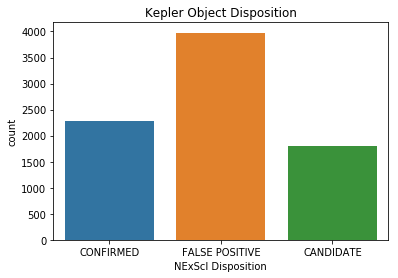

In [13]:
sns.countplot(x='NExScI Disposition',data=data)
plt.title('Kepler Object Disposition')
plt.show()

In [66]:
from sklearn.decomposition import PCA,KernelPCA
from sklearn.preprocessing import StandardScaler

data_num=X=data.iloc[:,3:]
escalado = StandardScaler().fit_transform(data_num)
pca = PCA(n_components=2)
pca.fit(escalado)
escalado2 = pca.transform(escalado)

In [151]:
from sklearn.decomposition import PCA,KernelPCA

escalado_kpca = KernelPCA(kernel="rbf",n_components=2,fit_inverse_transform=True, gamma=0.5).fit_transform(escalado)


In [142]:
escalado_kpca[:10]

array([[-0.00217176, -0.0014379 ],
       [-0.00221943, -0.00147754],
       [-0.00215916, -0.00142737],
       [-0.00215916, -0.00142737],
       [-0.00215916, -0.00142737],
       [-0.00215916, -0.00142737],
       [-0.00215916, -0.00142737],
       [-0.00215916, -0.00142737],
       [-0.00217721, -0.00144291],
       [-0.00215916, -0.00142737]])

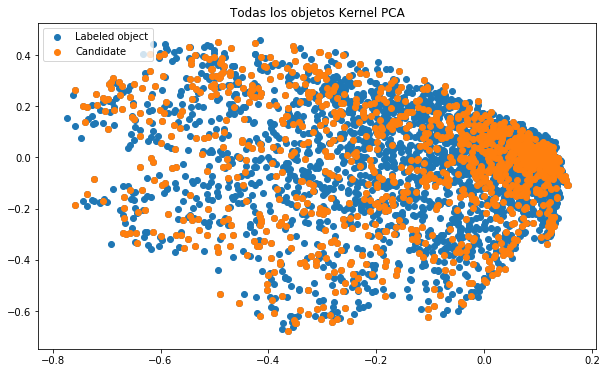

In [152]:
plt.figure(figsize=(10,6))
plt.scatter(escalado_kpca[:,0], escalado_kpca[:,1],label="Labeled object")
plt.scatter(escalado_kpca[mask][:,0], escalado_kpca[mask][:,1],label="Candidate")
plt.title('Todas los objetos Kernel PCA')
plt.legend(loc='upper left')
plt.show()

In [67]:
mask = data["NExScI Disposition"]=='CANDIDATE'

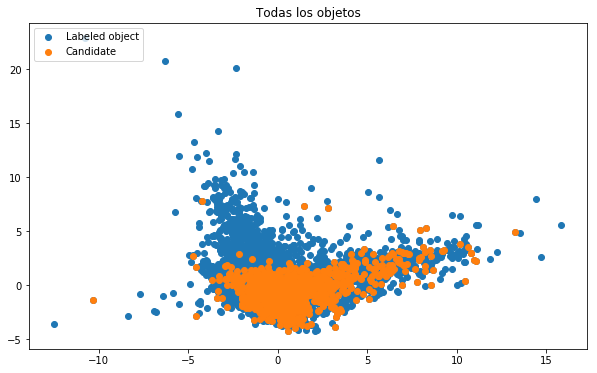

In [68]:
plt.figure(figsize=(10,6))
plt.scatter(escalado2[:,0], escalado2[:,1],label="Labeled object")
plt.scatter(escalado2[mask][:,0], escalado2[mask][:,1],label="Candidate")
plt.title('Todas los objetos')
plt.legend(loc='upper left')
plt.show()

In [111]:
from sklearn.cluster import SpectralClustering, DBSCAN, KMeans, Birch

In [91]:
clustering = SpectralClustering(n_clusters=3, assign_labels="discretize").fit(escalado2)
clustering_cand = SpectralClustering(n_clusters=3, assign_labels="discretize").fit(escalado2[mask])

In [36]:
clustering

SpectralClustering(affinity='rbf', assign_labels='discretize', coef0=1,
          degree=3, eigen_solver=None, eigen_tol=0.0, gamma=1.0,
          kernel_params=None, n_clusters=3, n_init=10, n_jobs=1,
          n_neighbors=10, random_state=None)

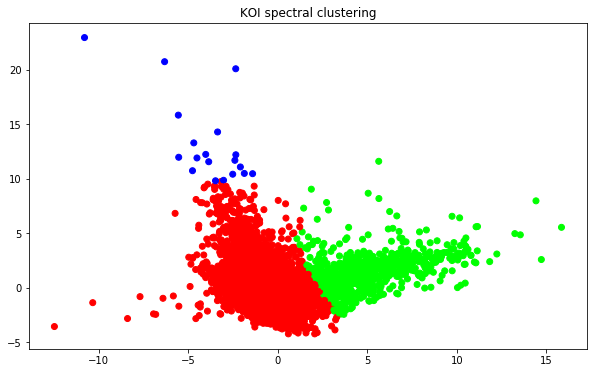

In [92]:
colormap = np.array(['red', 'lime', 'blue','grey','yellow','brown','pink','black','purple','olive','emerald','crimson'])
plt.figure(figsize=(10,6))
plt.scatter(escalado2[:,0], escalado2[:,1], c=colormap[clustering.labels_])
plt.title('KOI spectral clustering')
plt.show()

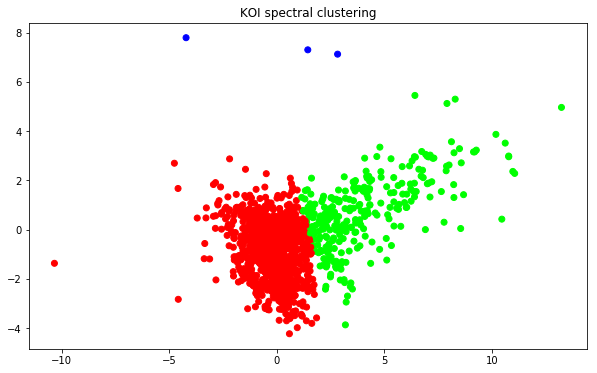

In [93]:
colormap = np.array(['red', 'lime', 'blue','grey','yellow','brown','pink','black','purple','olive','emerald','crimson'])
plt.figure(figsize=(10,6))
plt.scatter(escalado2[mask][:,0], escalado2[mask][:,1], c=colormap[clustering_cand.labels_])
plt.title('KOI spectral clustering')
plt.show()

In [96]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(escalado2)
print (kmeans.labels_)
kmeans_cand = KMeans(n_clusters=3, random_state=0).fit(escalado2[mask])
kmeans_cand.labels_

[1 1 2 ... 1 1 1]


array([2, 2, 2, ..., 0, 2, 2], dtype=int32)

In [97]:
print (kmeans.cluster_centers_)
kmeans_cand.cluster_centers_

[[-1.81067682  3.49038655]
 [-0.2974274  -0.65939414]
 [ 5.21292758  1.54718178]]


array([[-0.30494325, -0.2011262 ],
       [ 5.00520755,  1.40542425],
       [ 0.49229713, -1.85468537]])

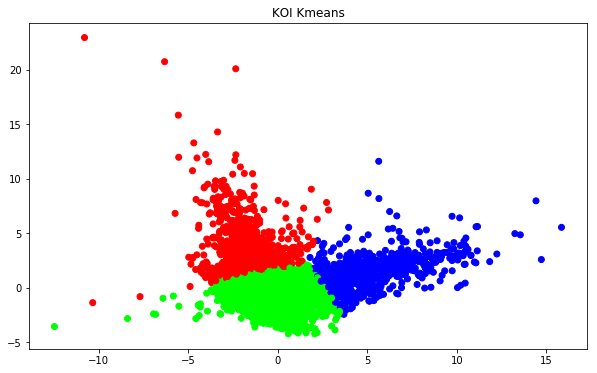

In [98]:
colormap = np.array(['red', 'lime', 'blue','grey','yellow','black','purple','olive'])
plt.figure(figsize=(10,6))
plt.scatter(escalado2[:,0], escalado2[:,1], c=colormap[kmeans.labels_])
plt.title('KOI Kmeans')
plt.show()

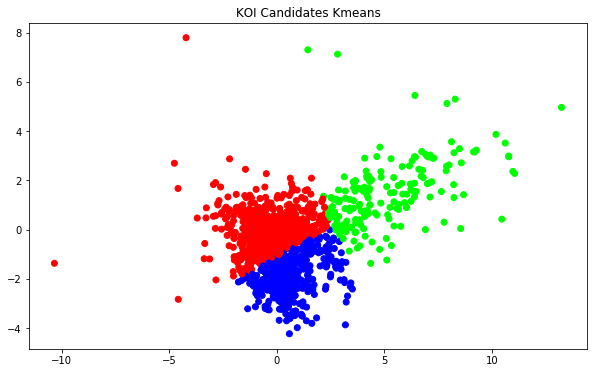

In [99]:
colormap = np.array(['red', 'lime', 'blue','grey','yellow','black','purple','olive'])
plt.figure(figsize=(10,6))
plt.scatter(escalado2[mask][:,0], escalado2[mask][:,1], c=colormap[kmeans_cand.labels_])
plt.title('KOI Candidates Kmeans')
plt.show()

In [115]:
brc = Birch(branching_factor=50, n_clusters=5, threshold=0.5,compute_labels=True).fit(escalado2)
brc_cand = Birch(branching_factor=50, n_clusters=5, threshold=0.5,compute_labels=True).fit(escalado2[mask])

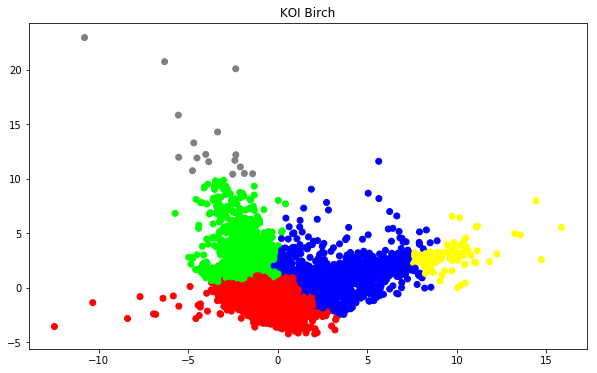

In [121]:
colormap = np.array(['red', 'lime', 'blue','grey','yellow','black','purple','olive'])
plt.figure(figsize=(10,6))
plt.scatter(escalado2[:,0], escalado2[:,1], c=colormap[brc.labels_])

plt.title('KOI Birch')
plt.show()

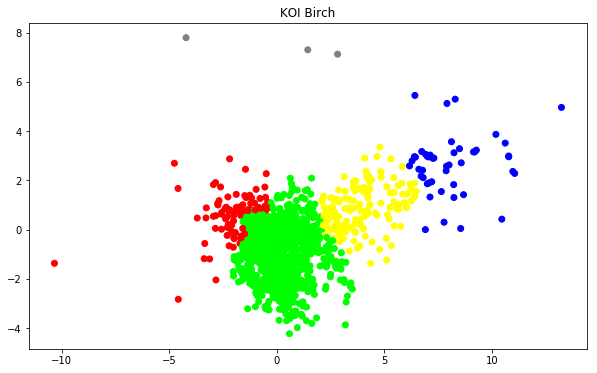

In [120]:
colormap = np.array(['red', 'lime', 'blue','grey','yellow','black','purple','olive'])
plt.figure(figsize=(10,6))
plt.scatter(escalado2[mask][:,0], escalado2[mask][:,1], c=colormap[brc_cand.labels_])
plt.title('KOI Birch')
plt.show()

In [132]:
from sklearn.cluster import MiniBatchKMeans

mbk=MiniBatchKMeans(n_clusters=3,random_state=0,batch_size=6).fit(escalado2)
mbk_cand=MiniBatchKMeans(n_clusters=3,random_state=0,batch_size=6).fit(escalado2[mask])

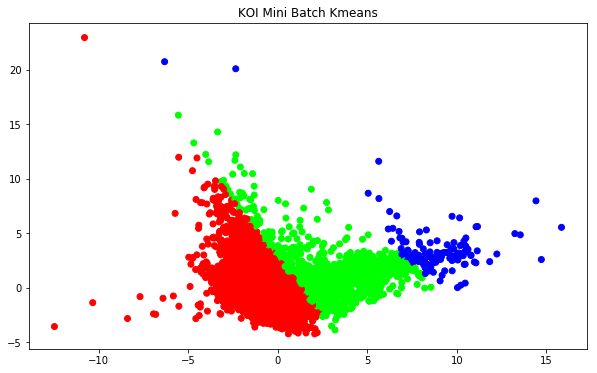

In [135]:
colormap = np.array(['red', 'lime', 'blue','grey','yellow','black','purple','olive','green'])
plt.figure(figsize=(10,6))
plt.scatter(escalado2[:,0], escalado2[:,1], c=colormap[mbk.labels_])
plt.title('KOI Mini Batch Kmeans')
plt.show()

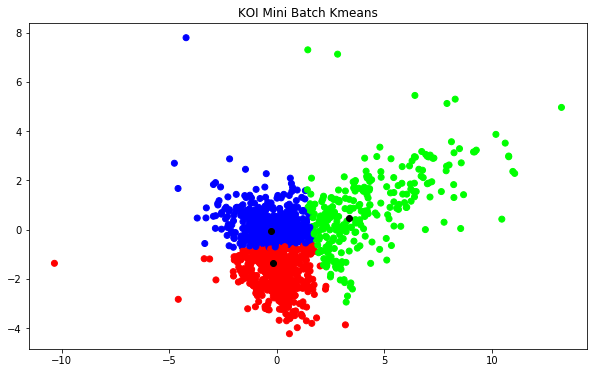

In [161]:
colormap = np.array(['red', 'lime', 'blue','grey','yellow','black','purple','olive','green'])
plt.figure(figsize=(10,6))
plt.scatter(escalado2[mask][:,0], escalado2[mask][:,1], c=colormap[mbk_cand.labels_])
plt.scatter(mbk_cand.cluster_centers_[:,0],mbk_cand.cluster_centers_[:,1],c='black')
plt.title('KOI Mini Batch Kmeans')
plt.show()

In [158]:
def distancia_minima(centroides,punto):
    distancias=[]
    for centroide in centroides:
        distancias.append(np.sqrt((centroide[0]-punto[0])**2+(centroide[1]-punto[1])**2))
    return min(distancias)

In [197]:
index_dis=[]
for i in range(len(escalado2)):
    if not mask[i]:
        punto=escalado2[i]
        index_dis.append((i,distancia_minima(mbk_cand.cluster_centers_,punto)))
    

In [198]:
index_dis.sort(key=lambda x: x[1])

In [211]:
index_val=np.asarray(index_dis)[:,0][:int(len(index_dis)*0.25)]
index_train=np.asarray(index_dis)[:,0][int(len(index_dis)*0.25):]

In [212]:
len(index_val)

1564

In [213]:
len(index_train)

4693

In [214]:
len(index_dis)

6257

In [229]:
df = pd.DataFrame()
df["KOI Name"] = data["KOI Name"]
df["Set"] = temp
df.head()

,KOI Name,Set
0,K00889.01,Train
1,K01009.01,Train
2,K07621.01,Train
3,K06252.01,Train
4,K00958.01,Unlabeled


In [230]:
df.to_csv("../Datos/koi_sets.csv",index=False)

In [227]:
temp=[]
for i in range(len(df)):
    if i in index_train:
        temp.append("Train")
    elif i in index_val:
        temp.append("Test")
    else:
        temp.append("Unlabeled")
        

In [231]:
set(df["Set"])

{'Test', 'Train', 'Unlabeled'}

In [ ]:
df[""]